# 회귀 분석과 상관관계
---
- KOSPI와 다우존스의 지수의 상관관계를 분석한다.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


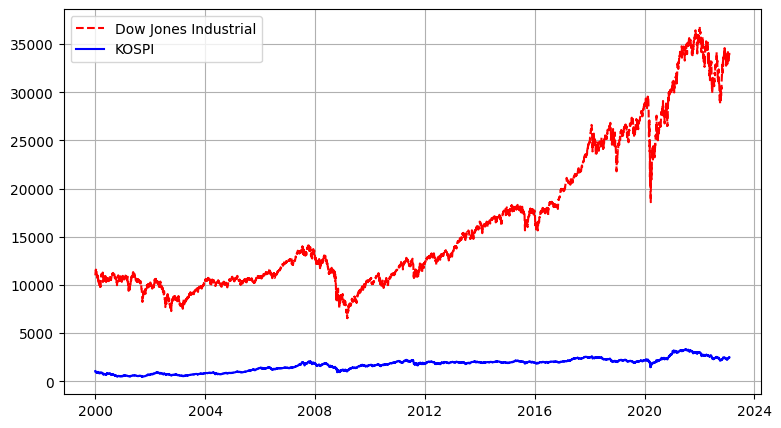

In [1]:
#바로 데이터를 가져와서 상관관계를 분석하려고 했지만 두 데이터의 scale이 다르기에 바로 분석할 수 없다. 
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

dow= pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

plt.figure(figsize = (9,5))
plt.plot(dow.index, dow.Close,'r--',label = 'Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close,'b',label = 'KOSPI')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

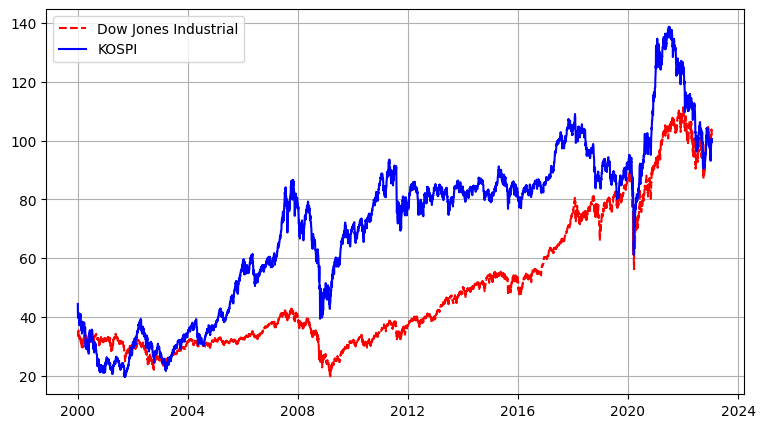

In [34]:
#위의 문제로 일별 종가만으로는 비교가 어렵다.
#그래서 현재 종가를 특정 시점의 종가로 나누어서 변동률을 구한다.
import matplotlib.pyplot as plt

d = (dow.Close/dow.Close.iloc[-1])*100
k = (kospi.Close/kospi.Close.iloc[-1])*100

plt.figure(figsize = (9,5))
plt.plot(d.index, d,'r--',label = 'Dow Jones Industrial')
plt.plot(k.index, k,'b',label = 'KOSPI')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

In [35]:
#산점도 분석
#dow와 kospi의 크기가 다르기 때문에 두개의 series를 합쳐서 결측치를 제거한다.
#두 Series의 인덱스 형태가 다르기 때문에 전처리가 필요하다. 
#strftime함수를 사용하면 시계열을 문자열로 바꾼다.(string from time)
import pandas as pd
import numpy as np
dow.index = dow.index.strftime('%Y-%m-%d')
kospi.index = kospi.index.strftime('%Y-%m-%d')
print(len(dow), len(kospi))
df = pd.DataFrame({'Dow': dow['Close'], 'KOSPI': kospi['Close']})
df.head()

5798 5687


,Dow,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990


In [36]:
#결측치가 있기에 fillna()함수를 사용해서 채워준다.
#bfill을 사용해서 NaN의 뒤의 값으로 덮어쓰고 ffill을 사용해서 앞의 값을 사용해서 덮어쓴다. 
print(df.isnull().sum(), end = '\n\n')
df =df.fillna(method = 'bfill')
print(df.isnull().sum(), end = '\n\n')
df = df.fillna(method = 'ffill')
print(df.isnull().sum())

Dow      180
KOSPI    291
dtype: int64

Dow      1
KOSPI    0
dtype: int64

Dow      0
KOSPI    0
dtype: int64


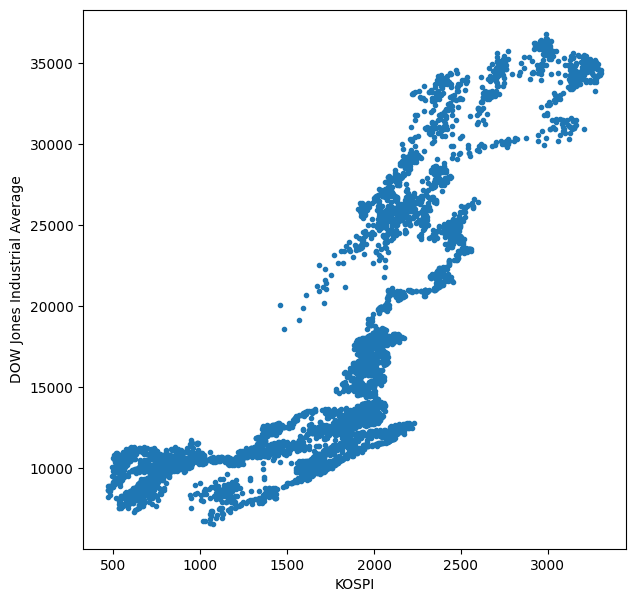

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.scatter(df['KOSPI'],df['Dow'], marker = '.')
plt.xlabel("KOSPI")
plt.ylabel('DOW Jones Industrial Average')
plt.show()

In [49]:
#scipy를 사용해서 간단하게 선형회귀분석을 진행해본다.
from scipy import stats
regr = stats.linregress(df['KOSPI'],df['Dow'])
regr

LinregressResult(slope=9.498353787598754, intercept=252.78620336187123, rvalue=0.8221419487593193, pvalue=0.0, stderr=0.08507933903457325, intercept_stderr=154.88110916795898)

# 상관계수에 따른 리스크 완화
---
- 상관계수는 독립변수와 종속변수 사이의 상관관계의 정도를 나타내는 수치다. 
- -1<=r<=1 을 항상 만족시킨다. 
- 결정계수는 관측된 데이터에서 추정한 회귀선이 실제로 데이터를 어느 정도 설명하는지를 나타내는 계수다.
- 두 변수의 상관계수를 제곱한 값이다. 

In [44]:
#corr()함수 하나로 간단하게 상관관계를 볼 수 있다. 
df.corr() 
r_value = df['Dow'].corr(df['KOSPI'])
r_squared = r_value**2
print(r_value, r_squared)

0.8221419487593192 0.6759173839097711


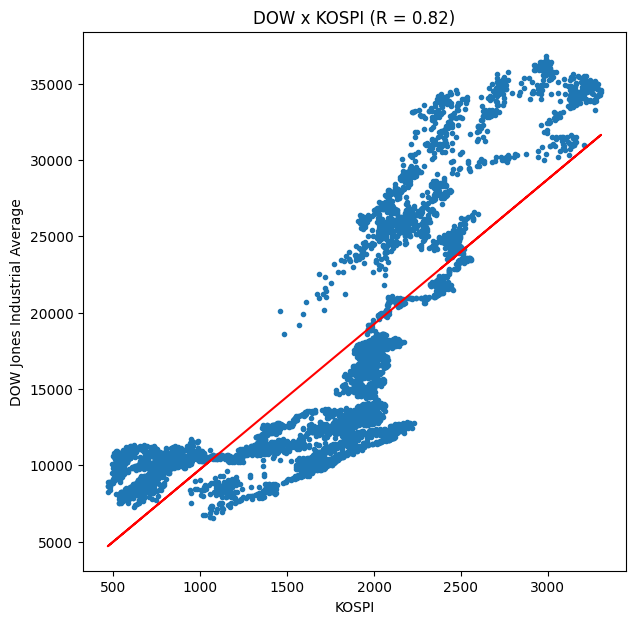

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.scatter(df['KOSPI'],df['Dow'], marker = '.')
plt.plot(df['KOSPI'], regr.slope * df['KOSPI'] + regr.intercept,'r')
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel("KOSPI")
plt.ylabel('DOW Jones Industrial Average')
plt.show()